In [358]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt
import pdb
from sklearn.linear_model import Perceptron as skperc

from scipy.io import arff
import pandas as pd

# Download file with curl
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff --output debug-data.arff

data = arff.loadarff('debug-data.arff')
df = pd.DataFrame(data[0])
df.head()

np_data = np.array(df)

data = np.array(df)
X = data[:,0:-1]
numCols = np.shape(X)[0]
X_bias = np.concatenate((X,np.ones((numCols,1))),axis=1)
y = np.reshape([int(s.decode()) for s in data[:,-1]], (-1, 1)) ##Filters out the b's




class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, lr=.1, shuffle=True):
        """ 
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT 
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle
        self.accuracyList = []

    ## x is dataset, y is labels, 
    def fit(self, X_bias, y, numEpochs=None , initial_weights=None, zerovector=False,): ## TRAIN
        """ 
            Fit the data; run the algorithm and adjust the weights to find a 
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 2D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial 
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """

        if (zerovector):
            self.weights = np.zeros(X_bias.shape[1])
        else:
          self.weights = self.initialize_weights
            #self.weights = self.initialize_weights(initial_weights) if not initial_weights else initial_weights

        # print("X_bias\n")
        # print(X_bias)
        # print("original weights\n")
        # print(self.weights)

        currEpochs = 0
        # Training
        done = False
        if (numEpochs == None):
          #Exit when weights dont change after 3 epochs
          """ Run the network forward """
          while (not done):
              if self.shuffle:
                self._shuffle_data(X_bias, y)

              net = self.weights.T.dot(X_bias[i])
              output = 1 if net > 0 else 0
              t_minus_z = y[i] - output

              wight_change = self.lr * t_minus_z * X_bias[i, :]
              if (weight_change == 0):
                count += 1  
              if (count == 3):
                break
              self.weights = self.weights + weight_change
              print("Iteration: " + str(currEpochs))
              currEpochs += 1
                

        #while (not done): 
        for _ in range(numEpochs):
     
            """ Run the network forward """
            for i in range(X_bias.shape[0]):
                if self.shuffle:
                  self._shuffle_data(X_bias, y)
 
                net = self.weights.T.dot(X_bias[i])

                output = 1 if net > 0 else 0
                t_minus_z = y[i] - output

                # Compute change in weight and create the new weights
                self.weights = self.weights + self.lr * t_minus_z * X_bias[i, :]

                
                # if (self.score(X_bias, y) < .70):
                #      break
                
                # print("Iteration: " + str(currEpochs))
                currEpochs += 1
                # print(self.weights)

        # Use for DEBUGGING ->
       

        # activations = self.pcnfwd(X_bias)
        # print("Final outputs are:")
        # print(activations)

        return self

    ## given this x, predict y
    def predict(self, X):
        """ 
            Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding 
            targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        #pdb.set_trace()
        self.activations = np.dot(X, self.weights)
        return np.where(self.activations>0,1.0,0.0)
        
    ## will initialize your weights. Just do random small weights with a numpy function between -1 and 1, include a bias
    def initialize_weights(self, X_bias):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """
        m = np.shape(X_bias)[1]
        

        self.weights = np.random.uniform(-1, 1, m)
        
        return self.weights



    def score(self, X, y):
        """ 
            Return accuracy of model on a given dataset. Must implement own 
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        #X = np.array(X)
        predicted_array = self.predict(X)

        correct = 0
        total = predicted_array.size
        for i in range(total):
          if (predicted_array[i] == y[i]):
            correct += 1
        # % correct
        percentage =  correct/total
        
        #pdb.set_trace()
        return percentage

        # meanAcc = 0
        # correct = 0
        # total = np.shape(X_bias)[0]
        # for i in range(total):
        #     if (self.predict(X_bias)[i] == y[i]):
        #       correct += 1
        # accuracy = correct/total
        # return accuracy

    def _shuffle_data(self, X_bias, y):
        """ 
            Shuffle the data! This _ prefix suggests that this method should 
            only be called internally.
            It might be easier to concatenate X & y and shuffle a single 2D 
            array, rather than shuffling X and y exactly the same way, 
            independently.
        """
        arrX = X_bias
        arry = np.array(y) 
        
        pdb.set_trace()
        joined = np.concatenate((arrX,arry.transpose),axis=1)
        np.random.shuffle(joined)
        X_bias = joined[:,:-1]
        y = joined[:,-1]
        return X_bias, y
        

    ### Not required by sk-learn but required by us for grading. Returns the weights.
    def get_weights(self):
        return self.weights





  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   197  100   197    0     0    924      0 --:--:-- --:--:-- --:--:--   924


1.1 DEBUG DATA SET

In [318]:
pcn = PerceptronClassifier(.1,False, )

#print(np.array(pcn.weights))
pcn.fit(X_bias, y, 10, None, True)
print(pcn.weights)
print(pcn.score(X_bias, y))

[-0.23000000000000004 0.1799999999999999 -0.1]
0.875


1.2 EVALUATION

In [320]:
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff --output eval-data.arff

data = arff.loadarff('eval-data.arff')
df = pd.DataFrame(data[0])
df.head()

np_data = np.array(df)

data = np.array(df)
X = data[:,0:-1]
numCols = np.shape(X)[0]
X_bias = np.concatenate((X,np.ones((numCols,1))),axis=1)
y = np.reshape([int(s.decode()) for s in data[:,-1]], (-1, 1)) ##Filters out the b's

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46685  100 46685    0     0   203k      0 --:--:-- --:--:-- --:--:--  203k


In [326]:
pcn = PerceptronClassifier(.1,False, )

#print(np.array(pcn.weights))
pcn.fit(X_bias, y, 10, None, True)
print(pcn.weights)
print(pcn.score(X_bias, y))

[-3.80657242 -2.8408210000000014 -3.0719334000000034 -1.4003906000000004
 4.899999999999999]
0.9876093294460642


2. (10%) Create 2 datasets

In [335]:
X = np.array([[0,.2],[.5,.5],[.3,.6],[.2,.7]])
Y = np.array([[-1,-1],[-.2,-.2],[-.3,-1],[-.5,-.3]])
X2 = np.array([[.1,.2],[.1,.6],[.3,.7],[.4,.5]])
Y2 = np.array([[.1,.3],[.2,.4],[.3,.3],[.4,.8]])
XY = np.vstack([X,Y])
XY2 = np.vstack([X2,Y2])
target_data = np.array([0,0,0,0,1,1,1,1])
initial_weights = np.zeros(3)

XY_bias = np.concatenate((XY,np.ones((np.shape(XY)[0],1))),axis=1)
XY2_bias = np.concatenate((XY2,np.ones((np.shape(XY2)[0],1))),axis=1)


In [336]:
print(XY)
print(XY2)
print(target_data)
print(initial_weights)
print(XY_bias)
print(XY2_bias)

[[ 0.   0.2]
 [ 0.5  0.5]
 [ 0.3  0.6]
 [ 0.2  0.7]
 [-1.  -1. ]
 [-0.2 -0.2]
 [-0.3 -1. ]
 [-0.5 -0.3]]
[[0.1 0.2]
 [0.1 0.6]
 [0.3 0.7]
 [0.4 0.5]
 [0.1 0.3]
 [0.2 0.4]
 [0.3 0.3]
 [0.4 0.8]]
[0 0 0 0 1 1 1 1]
[0. 0. 0.]
[[ 0.   0.2  1. ]
 [ 0.5  0.5  1. ]
 [ 0.3  0.6  1. ]
 [ 0.2  0.7  1. ]
 [-1.  -1.   1. ]
 [-0.2 -0.2  1. ]
 [-0.3 -1.   1. ]
 [-0.5 -0.3  1. ]]
[[0.1 0.2 1. ]
 [0.1 0.6 1. ]
 [0.3 0.7 1. ]
 [0.4 0.5 1. ]
 [0.1 0.3 1. ]
 [0.2 0.4 1. ]
 [0.3 0.3 1. ]
 [0.4 0.8 1. ]]


3. (10%) Train on Both Sets with your perceptron code.

In [ ]:
# Train on each Dataset

# slope = -(b / w2) / (b / w1)
# y-intercept = -b / w2
# y = (-(-b / w2) / (b / w1))x + (-b / w2)

# My fit function
# fit(self, X_bias, y, numEpochs=None , initial_weights=None, zerovector=False,)

lin_fit1 = PerceptronClassifier(.1, True)
w1, w2, b = lin_fit1.fit(XY_bias, target_data, None, initial_weights, False)
lin_fit1.get_weights() #, 10, None, True)
domain = np.linspace(min(XY_bias[:,0]) -.1, max(XY_bias[:,0]) + .1, 100)

lin_fit2 = PerceptronClassifier(.1, True)
w12, w22, b2 = lin_fit2.fit(XY2_bias, target_data, None, initial_weights, False)
lin_fit2.get_weights()
domain = np.linespace(min(XY2_bias[:,0]) - .1, max(XY2_bias[:, 0]) + .1, 100)

> <ipython-input-358-05b82452e03d>(201)_shuffle_data()
-> joined = np.concatenate((arrX,arry.transpose),axis=1)
(Pdb) arry
array([0, 0, 0, 0, 1, 1, 1, 1])
(Pdb) arry.transpose
<built-in method transpose of numpy.ndarray object at 0x7f307a1f08f0>
(Pdb) arry.t
*** AttributeError: 'numpy.ndarray' object has no attribute 't'
(Pdb) arry.transpose()_
*** SyntaxError: invalid syntax
(Pdb) arry.transpose()
array([0, 0, 0, 0, 1, 1, 1, 1])
(Pdb) arrX
array([[ 0. ,  0.2,  1. ],
       [ 0.5,  0.5,  1. ],
       [ 0.3,  0.6,  1. ],
       [ 0.2,  0.7,  1. ],
       [-1. , -1. ,  1. ],
       [-0.2, -0.2,  1. ],
       [-0.3, -1. ,  1. ],
       [-0.5, -0.3,  1. ]])


Discuss the effect of learning rate, inlcuding how many epochs are completed before stopping. For these cases learning rate should have minimal effect.

In [352]:
lin_fit3 = PerceptronClassifier(.1,True)
lin_fit3.fit(XY, target_data, initial_weights)
print("epochs for lr = .1")
print(lin_fit1.get_epochs_ran())

lin_fit3 = PerceptronClassifier(.2,True)
lin_fit3.fit(XY, target_data, initial_weights)
print("epochs for lr = .2")
print(lin_fit1.get_epochs_ran())
lin_fit3 = PerceptronClassifier(.1,True)
lin_fit3.fit(XY, target_data, initial_weights)
print("epochs for lr = .5")
print(lin_fit1.get_epochs_ran())
lin_fit3 = PerceptronClassifier(.1,True)
lin_fit3.fit(XY, target_data, initial_weights)
print("epochs for lr = 1")
print(lin_fit1.get_epochs_ran())

# 32 for all of them

ValueError: ignored

4. (10%) Graph the instances and decision line for the two cases above (with LR=.1)

NameError: ignored

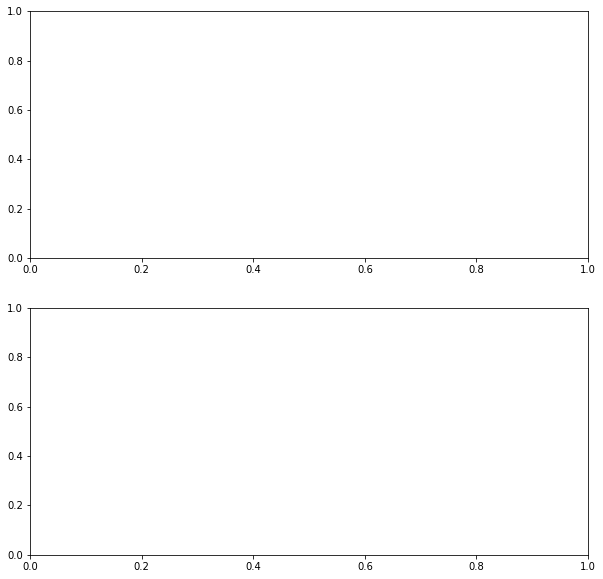

In [357]:
#Graph decision Line
fig,axs = plt.subplots(2, figsize=(10,10))
domain = np.linspace(min(XY[:,0]) -.1, max(XY[:,0]) + .1, 100)

# Creates a range starting at 0 to 10 with 100 points  
# domain = np.linspace(0, 10, 100) 

# b is our 3rd weight
axs[0].plot(domain, -w1 / w2 * domain + b / w2)
axs[0].scatter(X[:, 0], X[:,1], color = 'blue')
axs[0].scatter(Y[:, 0], Y[:,1], color = 'red')
axs[0].set_xlabel("X Values")
axs[0].set_ylabel("Y Values")
axs[0].set_title("Perceptron - Best Fit Line")

axs[0].plot(domain, -w12 / w22 * domain + b2 / w22)
axs[0].scatter(X2[:, 0], X2[:,1], color = 'blue')
axs[0].scatter(Y2[:, 0], Y2[:,1], color = 'red')
axs[0].set_xlabel("X Values")
axs[0].set_ylabel("Y Values")
axs[0].set_title("Perceptron - Best Fit Line")

5.

In [355]:
data = arff.loadarrff('voting_data.arff')
df = pd.DataFrame(data[0])
voting_array = np.array(df)

##UGLY but it works
voting_array = np.array([[str(element)[2] for element in voting_array[i, :]] for i in range (voting_array.shape[0])])
mask1 = voting_array == 'n'
mask1 = voting_array == 'y'
mask1 = voting_array == 'r'
mask1 = voting_array == 'd'
voting_array[mask1] = int(0)
voting_array[mask2] = int(1)
voting_array[makk3] = int(0)
voting_array[mask4] = int(1)
voting_array = voting_array.astype(int)

voting_fit = PerceptronClassifier(.2, False)

test_score_list = list()
traning_score_list = list()
epoch_list = list(2 ** np.arange(4,9))
n = 5

# loop through the data to find a fit for a random with a 70/30 split
for i range(n):
  X, Y = voting_fit.shuffledata()#### Write a helper function maybe?
  testX, testY = X[:300, :], Y[:300]
  trainX, trainY = X[300:, :] Y[300:]

  voting_fit.fit(trainX, trainY, None, False, True)
  test_score = voting_fit.score(testX, testY)
  training_score = voting_fit.score(trainX, trainY)
  test_score_list.append(test_score)
  trainig_score_list.append(training_score)

  ##Tabulate the results
  ##Make a beautiful table



SyntaxError: ignored